In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('/content/creditcard.csv')

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [16]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168486 entries, 0 to 168485
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    168486 non-null  float64
 1   V1      168486 non-null  float64
 2   V2      168486 non-null  float64
 3   V3      168486 non-null  float64
 4   V4      168486 non-null  float64
 5   V5      168486 non-null  float64
 6   V6      168486 non-null  float64
 7   V7      168486 non-null  float64
 8   V8      168486 non-null  float64
 9   V9      168486 non-null  float64
 10  V10     168486 non-null  float64
 11  V11     168486 non-null  float64
 12  V12     168485 non-null  float64
 13  V13     168485 non-null  float64
 14  V14     168485 non-null  float64
 15  V15     168485 non-null  float64
 16  V16     168485 non-null  float64
 17  V17     168485 non-null  float64
 18  V18     168485 non-null  float64
 19  V19     168485 non-null  float64
 20  V20     168485 non-null  float64
 21  V21     16

In [18]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,168486.0,60256.111202,27123.040842,0.000000,40964.000000,60221.000000,77993.000000,119247.000000
V1,168486.0,-0.176789,1.847361,-56.407510,-0.990038,-0.192225,1.181787,2.439207
V2,168486.0,0.044449,1.609052,-72.715728,-0.535327,0.112558,0.806294,22.057729
V3,168486.0,0.509615,1.376526,-33.680984,-0.040990,0.635292,1.303683,9.382558
V4,168486.0,0.121591,1.369688,-5.519697,-0.738416,0.128518,0.942582,16.875344


In [19]:
df.shape

(168486, 31)

In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
fraud_cases=len(df[df['Class']==1])

In [22]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 360


In [23]:
non_fraud_cases=len(df[df['Class']==0])

In [24]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 168125


In [25]:
fraud=df[df['Class']==1]

In [26]:
genuine=df[df['Class']==0]

In [27]:
fraud.Amount.describe()

,Amount
count,360.000000
mean,111.576722
std,227.309252
min,0.000000
25%,1.000000
50%,11.385000
75%,104.007500
max,1809.680000


In [28]:
genuine.Amount.describe()

,Amount
count,168125.000000
mean,87.006415
std,243.615524
min,0.000000
25%,5.450000
50%,21.640000
75%,76.280000
max,19656.530000


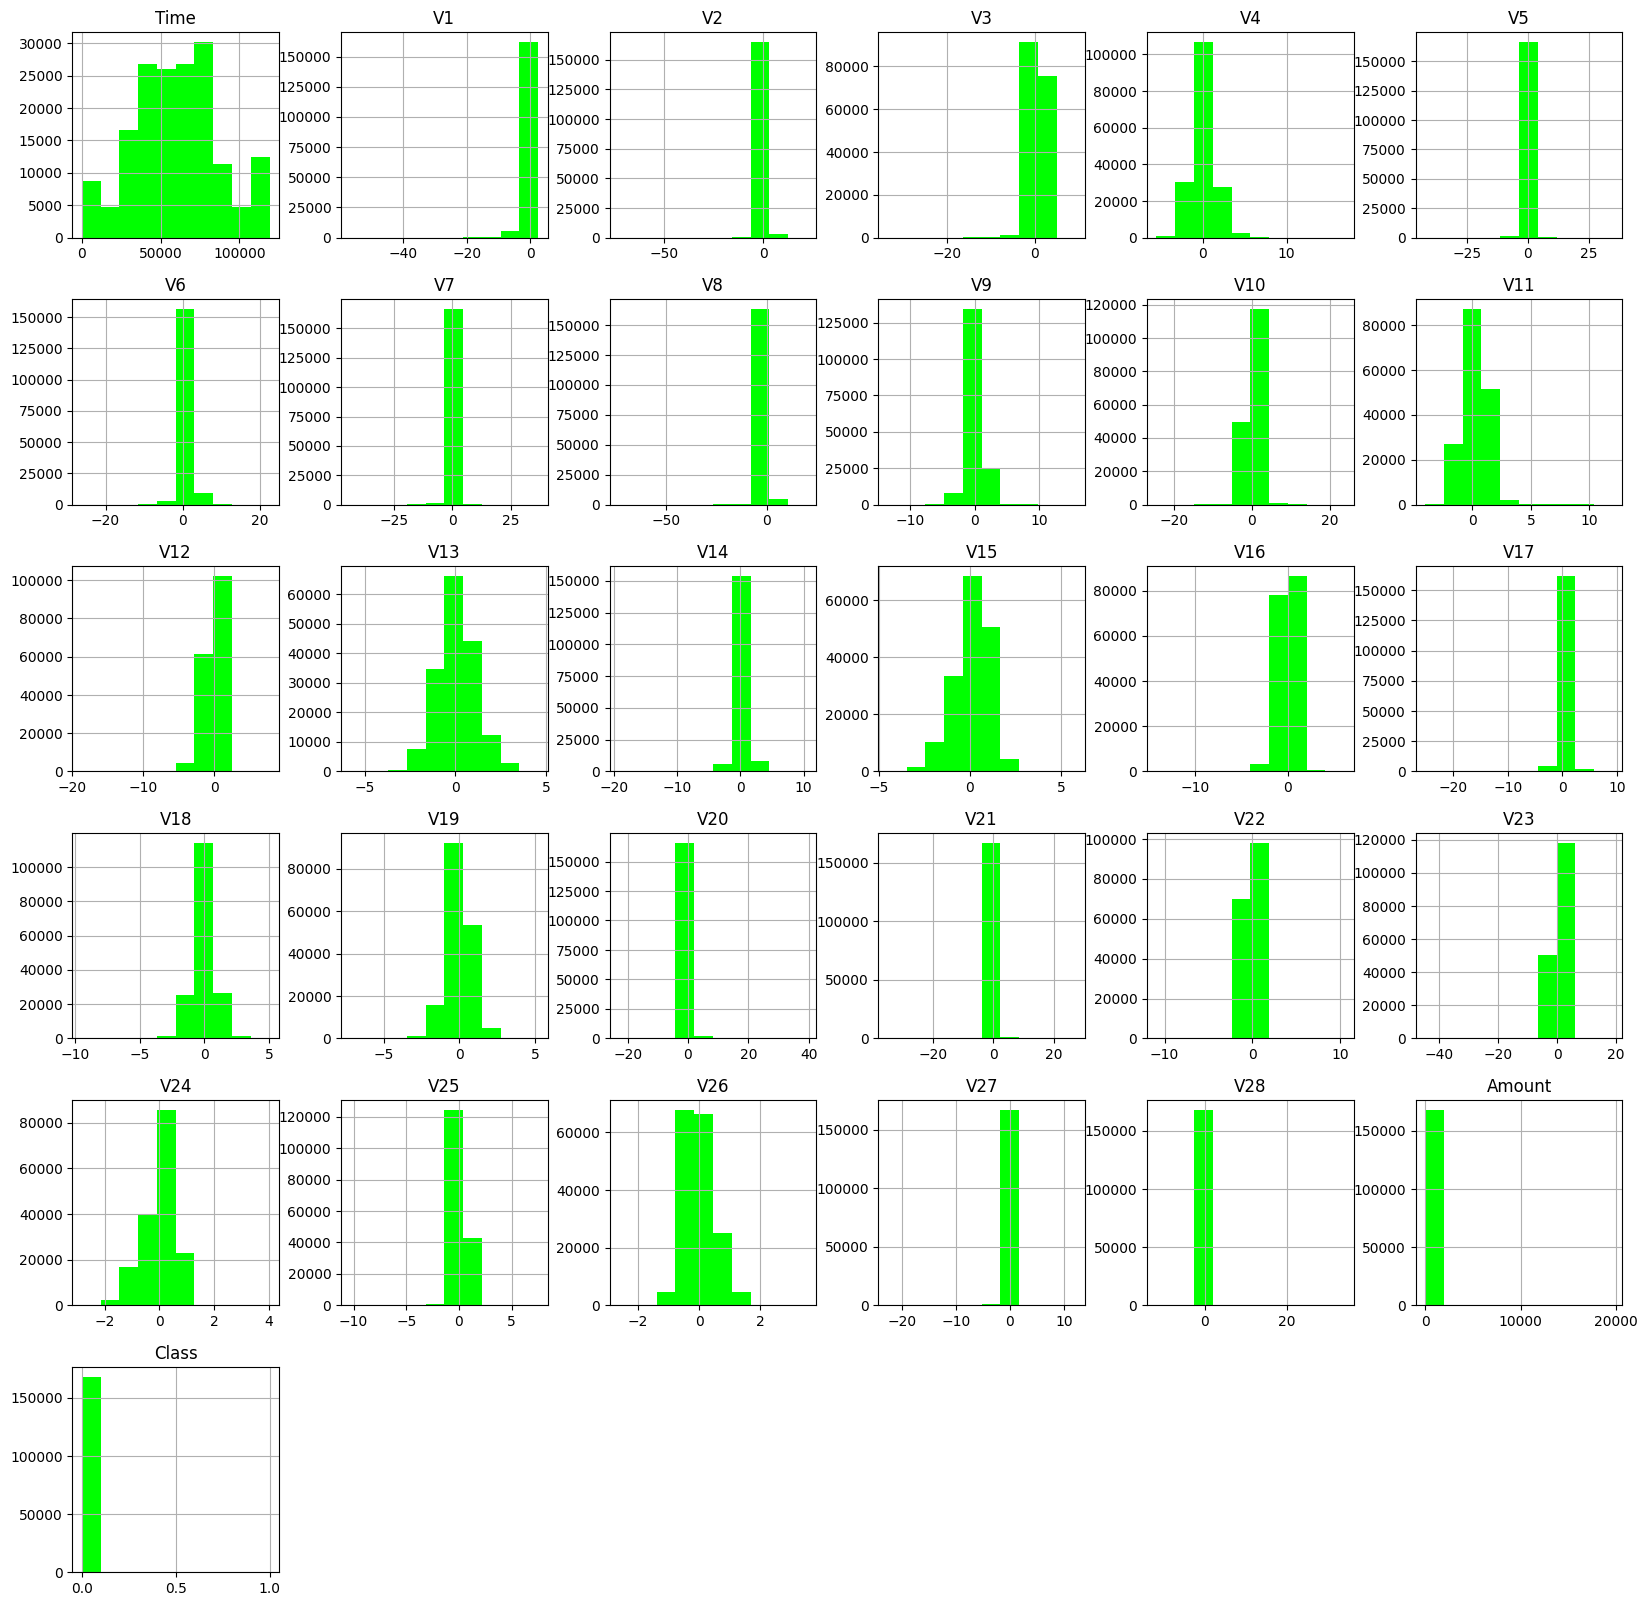

In [29]:
df.hist(figsize=(20,20),color='lime')
plt.show()

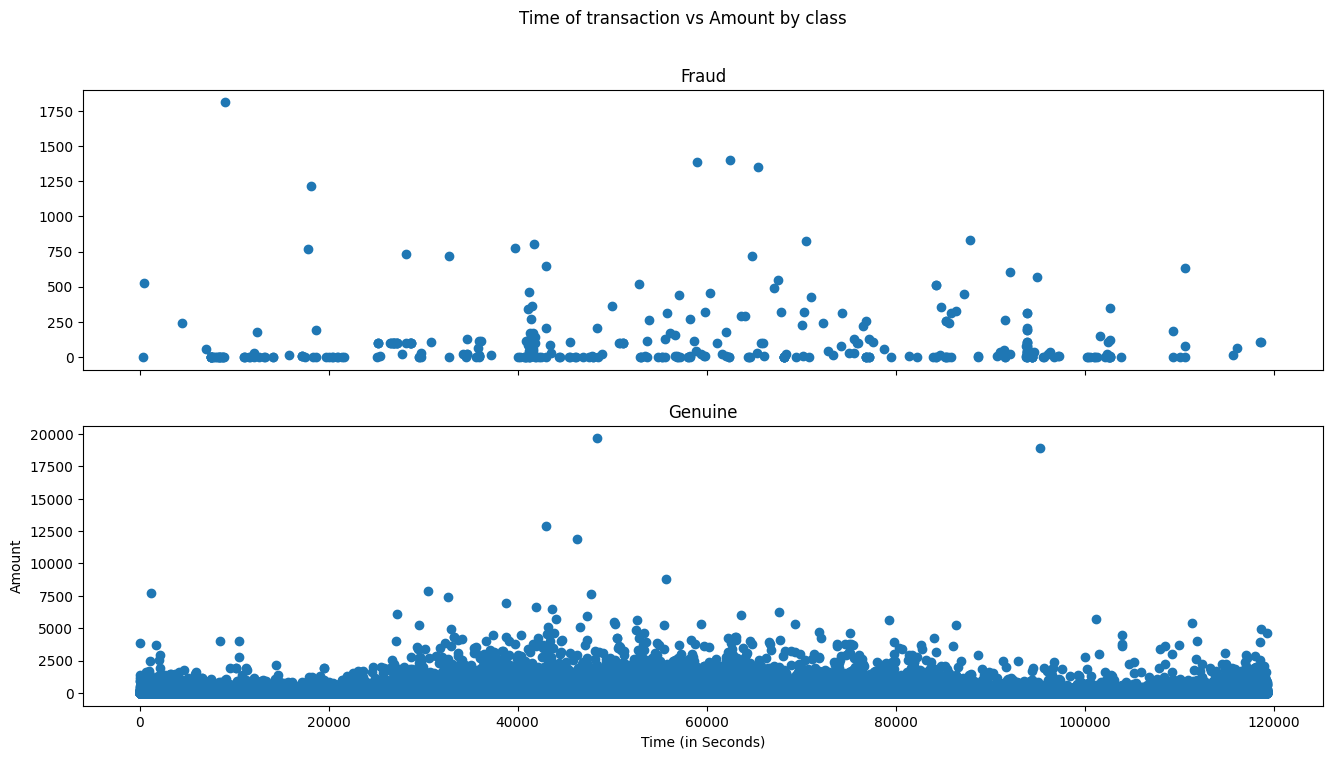

In [30]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

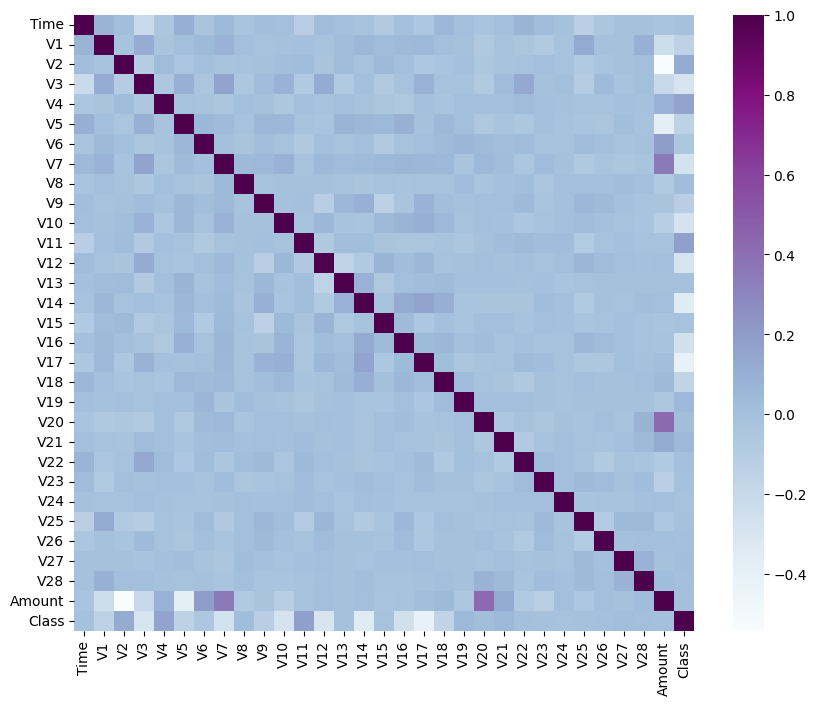

In [31]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,cmap='BuPu')

In [32]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
import pandas as pd
X2 = df.drop(['Class'], axis=1)

In [7]:
y2=df['Class']

In [8]:
dt=DecisionTreeRegressor()

In [9]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [10]:
model3=dt.fit(X2_train,y2_train)

In [11]:
prediction3=model3.predict(X2_test)

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score

print(f"NaN in y2_test: {np.isnan(y2_test).any()}")
print(f"Infinite values in y2_test: {np.isinf(y2_test).any()}")
print(f"NaN in prediction3: {np.isnan(prediction3).any()}")
print(f"Infinite values in prediction3: {np.isinf(prediction3).any()}")

y2_test = np.nan_to_num(y2_test)
prediction3 = np.nan_to_num(prediction3)

accuracy_score(y2_test, prediction3)

NaN in y2_test: False
Infinite values in y2_test: False
NaN in prediction3: False
Infinite values in prediction3: False


0.998911882245875